#### **Random Forest Classifier**


In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
sns.set(style="darkgrid")

**Data Loading and Inspection**


In [153]:
data = pd.read_csv("Social_Network_Ads.csv")

In [154]:
data.sample(5, random_state=42)

,Age,EstimatedSalary,Purchased
209,46,22000,0
280,59,88000,1
33,28,44000,0
210,48,96000,1
93,29,28000,0


In [155]:
data.shape

(400, 3)

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [157]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [158]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


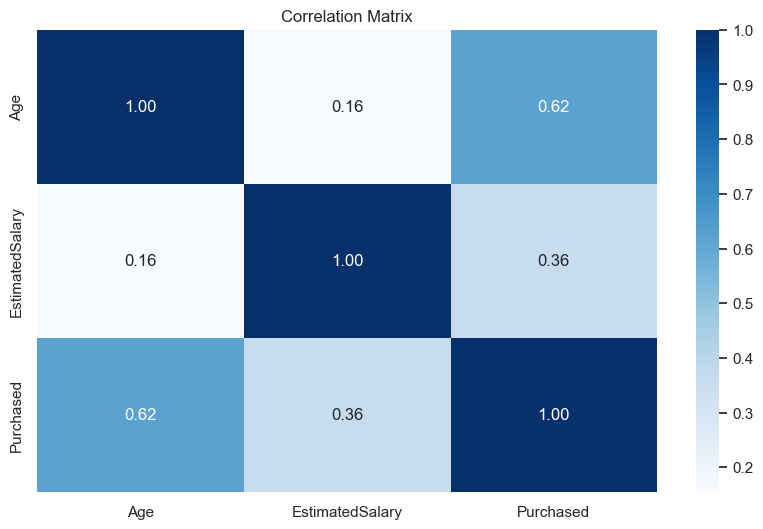

In [159]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Exploratory Data Analysis (EDA)**


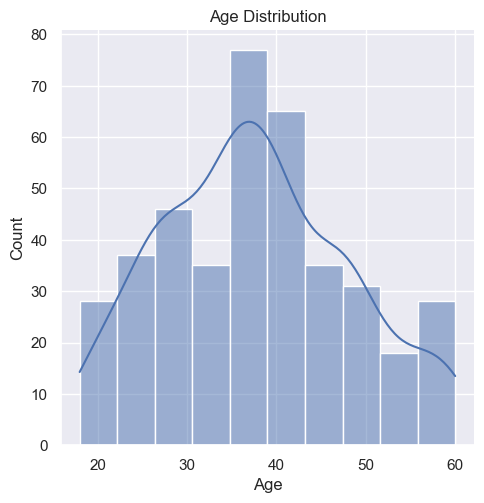

In [160]:
sns.displot(data=data, x="Age", kde=True, bins=10)
plt.title("Age Distribution")
plt.show()

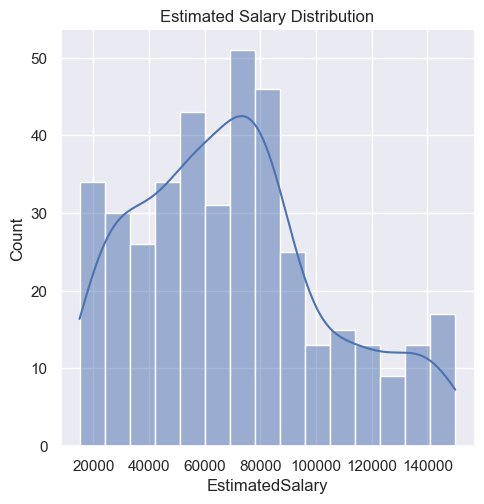

In [161]:
sns.displot(data=data, x="EstimatedSalary", kde=True, bins=15)
plt.title("Estimated Salary Distribution")
plt.show()

**Data Preparation**


Split the dataset into features and target variable


In [162]:
X = data.drop("Purchased", axis=1)
y = data[["Purchased"]]

Split the data into training and testing sets


In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X.values,
    y.values.reshape(-1, 1),
    test_size=0.33,
    random_state=42,
    stratify=y,
)

In [164]:
y.shape, y_train.shape, y_test.shape

((400, 1), (268, 1), (132, 1))

**Feature Scaling**


In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training a Random Forest Classifier with RandomizedSearchCV**


In [167]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [168]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [169]:
classifier = RandomForestClassifier(random_state=42)

param_dist = {
    "n_estimators": np.arange(5, 80, 5),
    "max_depth": np.arange(5, 50, 2),
    "min_samples_split": np.arange(2, 11, 2),
    "min_samples_leaf": np.arange(2, 6),
    "bootstrap": [True, False],
}

In [170]:
random_search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=param_dist,
    n_iter=250,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    random_state=42,
    verbose=2,
)
random_search.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37,
       39, 41, 43, 45, 47, 49]),
                                        'min_samples_leaf': array([2, 3, 4, 5]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10]),
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])},
                   random_state=42, scoring='f1', verbose=2)

**Fit the best model on the training data**


In [171]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=False, max_depth=np.int64(49),
                       min_samples_leaf=np.int64(3),
                       min_samples_split=np.int64(8), n_estimators=np.int64(65),
                       random_state=42)

**Making Predictions And Evaluating The Model**


In [172]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [181]:
# Training data predictions
y_train_pred = best_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

Training Accuracy: 0.9589552238805971


In [182]:
# Testing data predictions
y_test_pred = best_model.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Testing Accuracy: 0.9166666666666666


**Confusion Matrix**

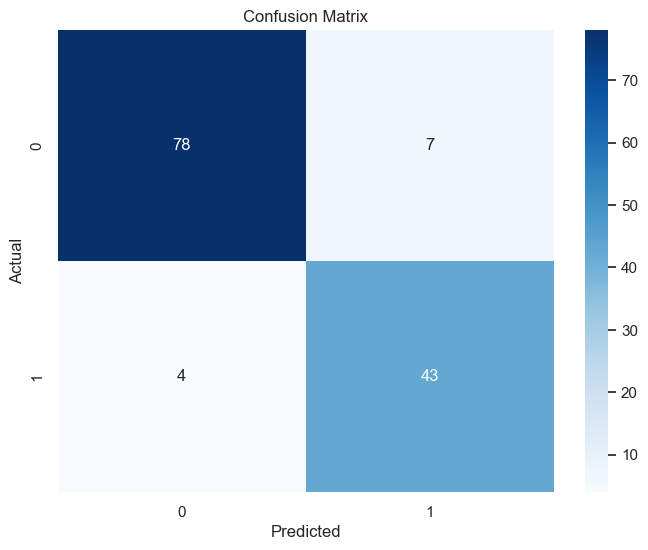

In [183]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [177]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        85
           1       0.86      0.91      0.89        47

    accuracy                           0.92       132
   macro avg       0.91      0.92      0.91       132
weighted avg       0.92      0.92      0.92       132



**Plot decision boundaries for the training and testing data**


In [178]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.25, cmap="Paired")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", marker="o", cmap="Paired")
    plt.xlabel("Age (scaled)")
    plt.ylabel("Estimated Salary (scaled)")
    plt.title("Decision Boundary")
    plt.show()

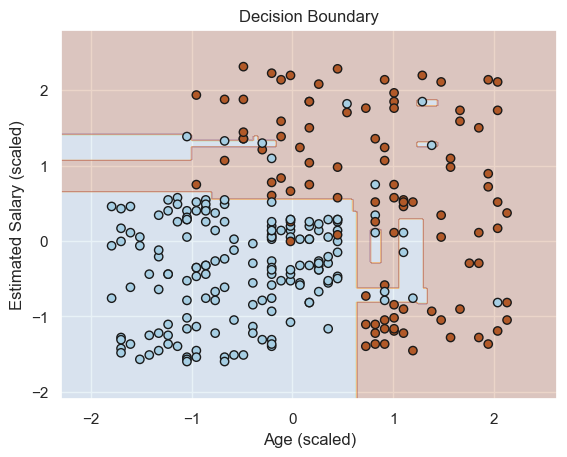

In [179]:
plot_decision_boundary(X_train, y_train, best_model)

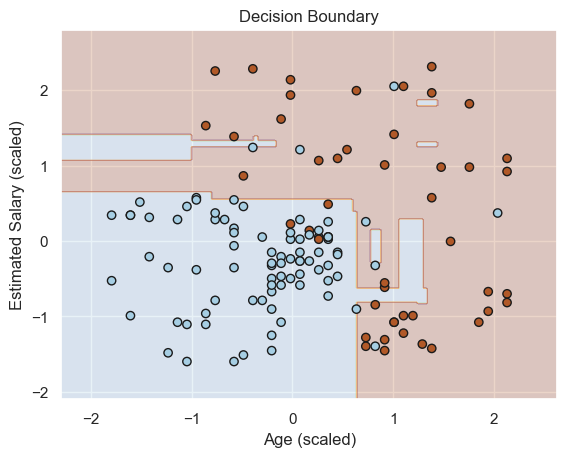

In [180]:
plot_decision_boundary(X_test, y_test, best_model)